# **Data Science Intern @LGM Virtual Internship 2023**
# **Task 2 Stock Market Prediction And Forecasting Using Stacked LSTM**
Objective: To build a model using Recurrent Neural Networks (RNN) and especially Long-Short Term Memory model (LSTM) to predict future stock market values.
# **By: Caleb Jren**

In [113]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
import mplfinance as mpf
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [5]:
dataset = 'NSE-TATAGLOBAL.csv'

In [38]:
df = pd.read_csv(dataset,index_col=0,parse_dates=True)
df.index.name = 'Date'
df.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41


In [9]:
df.tail(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2025,2010-08-03,118.3,119.95,117.90,118.65,118.30,611234,726.78
2026,2010-08-02,117.3,118.50,116.60,118.10,117.30,663593,779.85
2027,2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
2028,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2029,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [15]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [13]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


<Axes: >

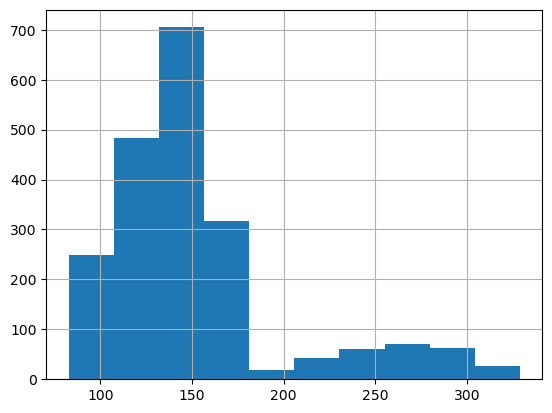

In [17]:
df['High'].hist()

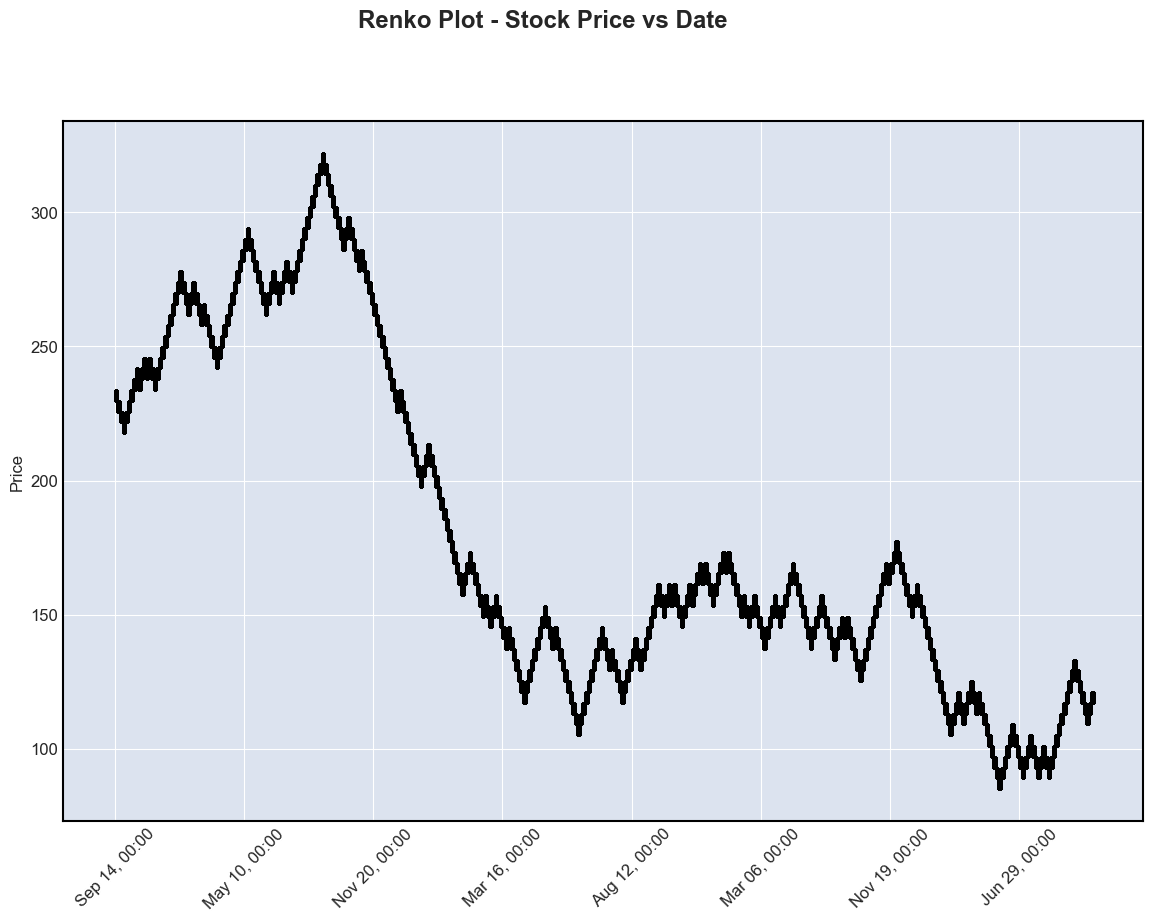

In [62]:
mpf.plot(df, type='renko', title='Renko Plot - Stock Price vs Date', figsize = (15,10))

D:\Downloads\Anaconda\anaconda\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




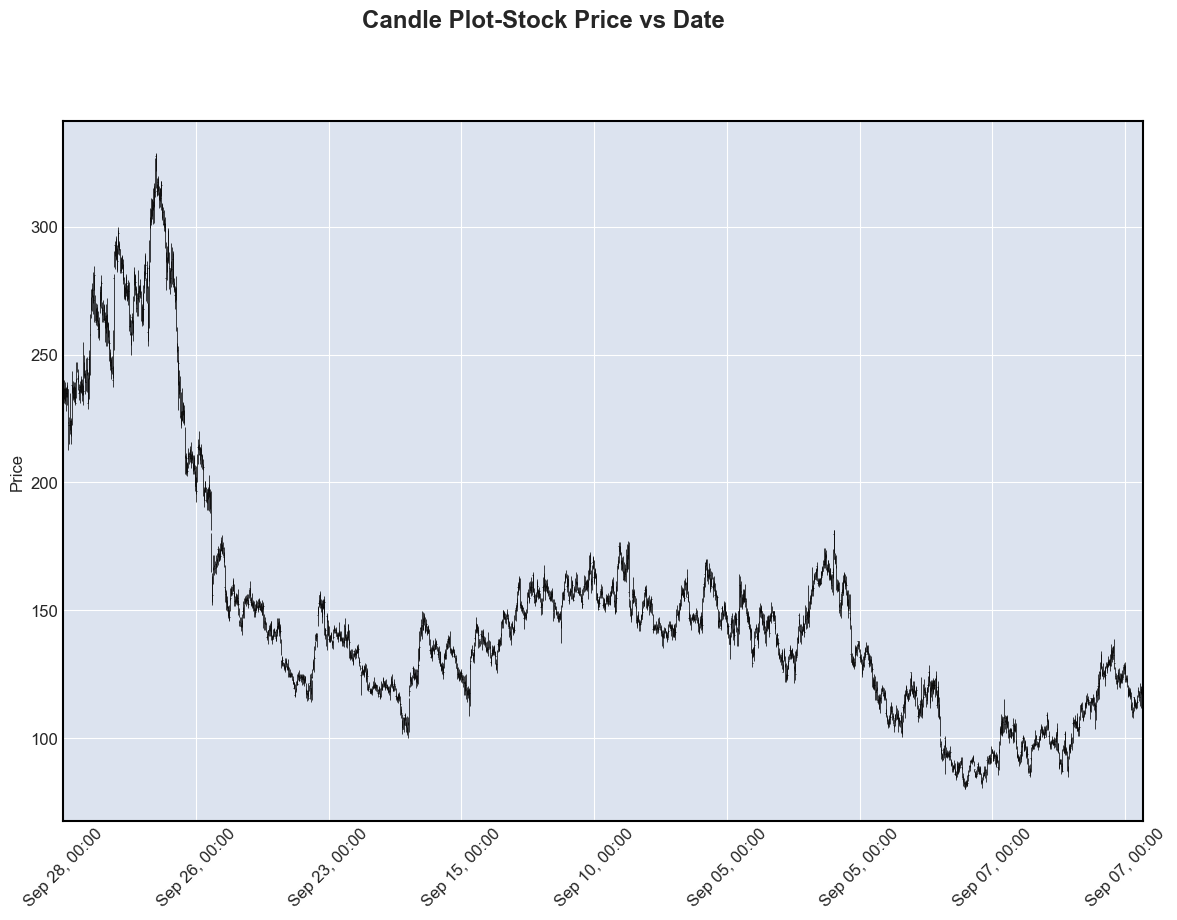

In [61]:
mpf.plot(df, xlim=(df.index[0], df.index[-1]), title='Candle Plot-Stock Price vs Date', figsize = (15,10))

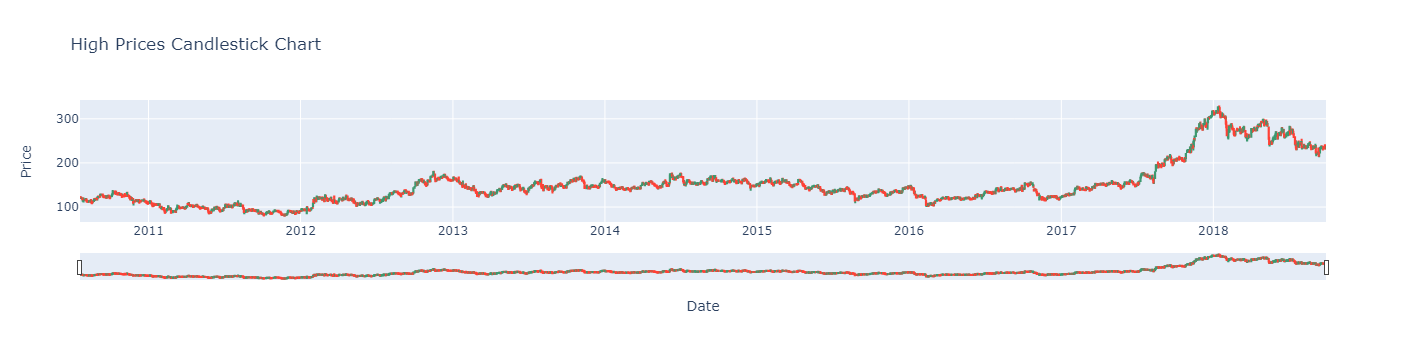

In [91]:
trace = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)

layout = go.Layout(
    title='High Prices Candlestick Chart',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price')
)

data = [trace]

fig = go.Figure(data=data, layout=layout)

fig.show()

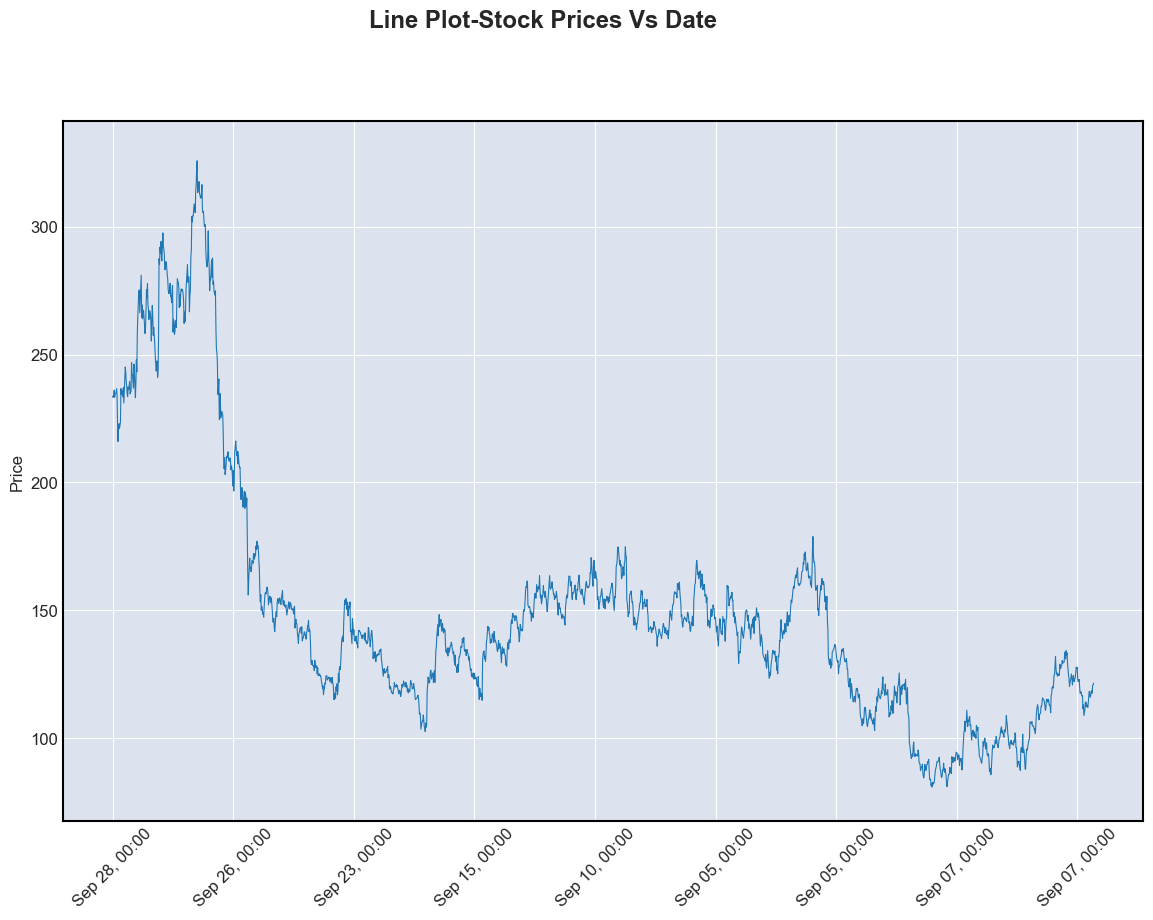

In [77]:
mpf.plot(daily,type='line', title = 'Line Plot-Stock Prices Vs Date', figsize=(15,10))


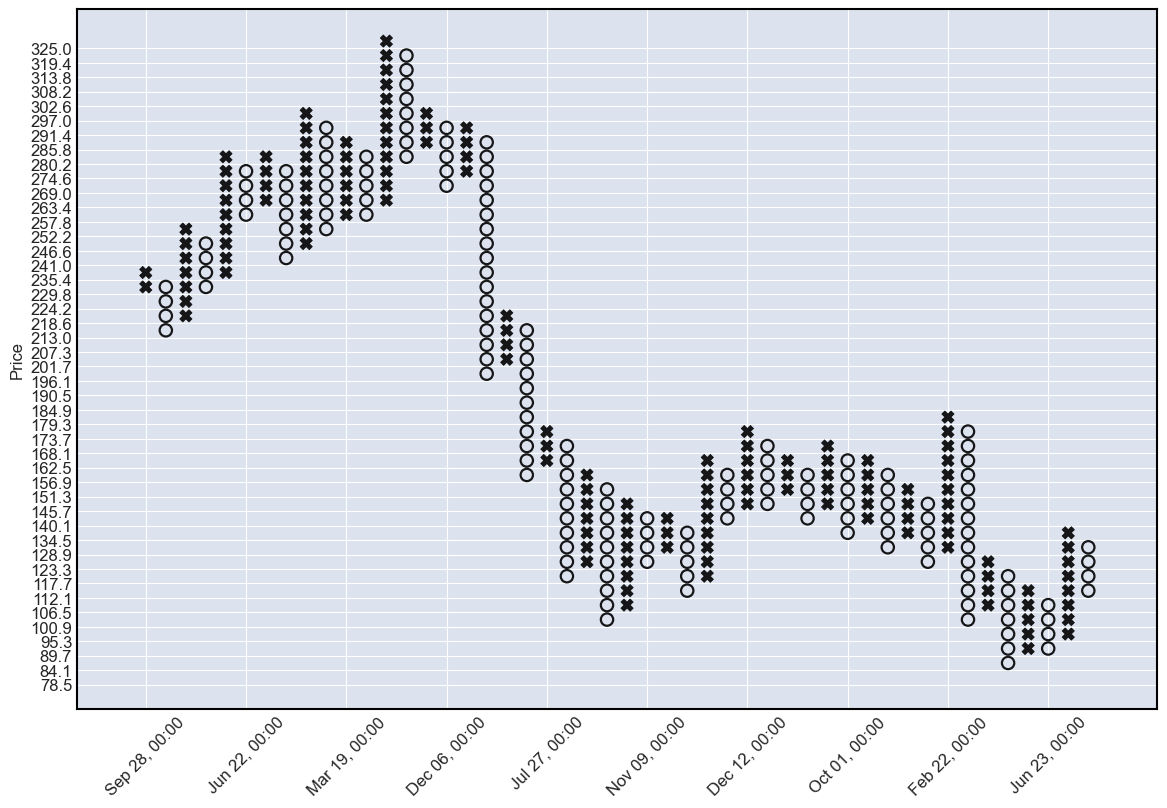

In [59]:
mpf.plot(df, type='pnf', figsize=(15, 10))

D:\Downloads\Anaconda\anaconda\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




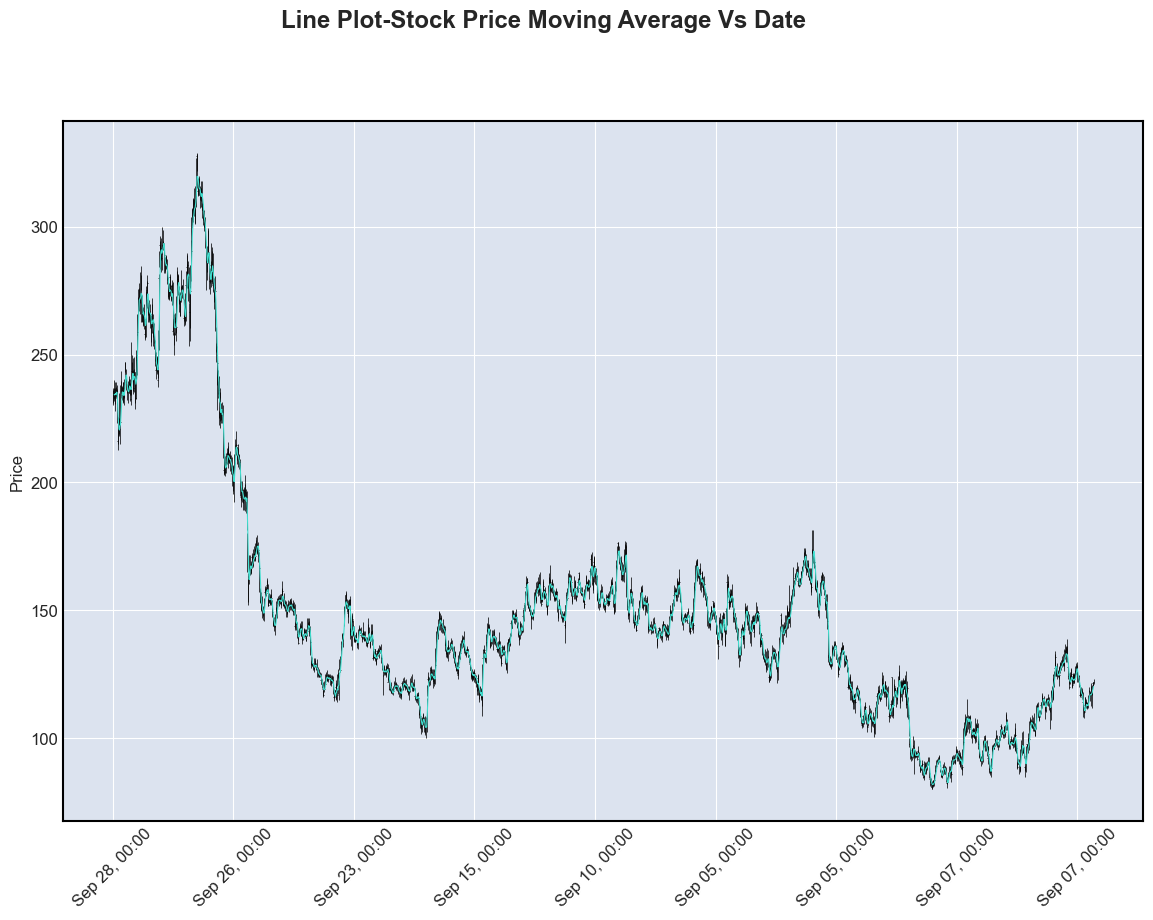

In [76]:
mpf.plot(df,type='ohlc',mav=4, title = 'Line Plot-Stock Price Moving Average Vs Date', figsize = (15,10))

<Axes: xlabel='Date'>

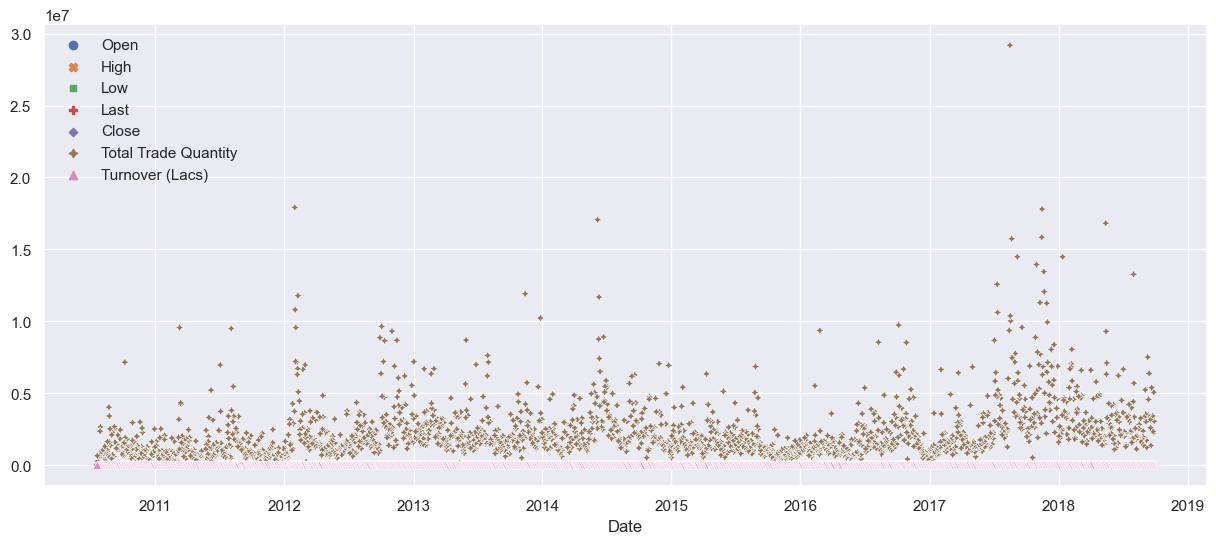

In [172]:
sns.scatterplot(df)

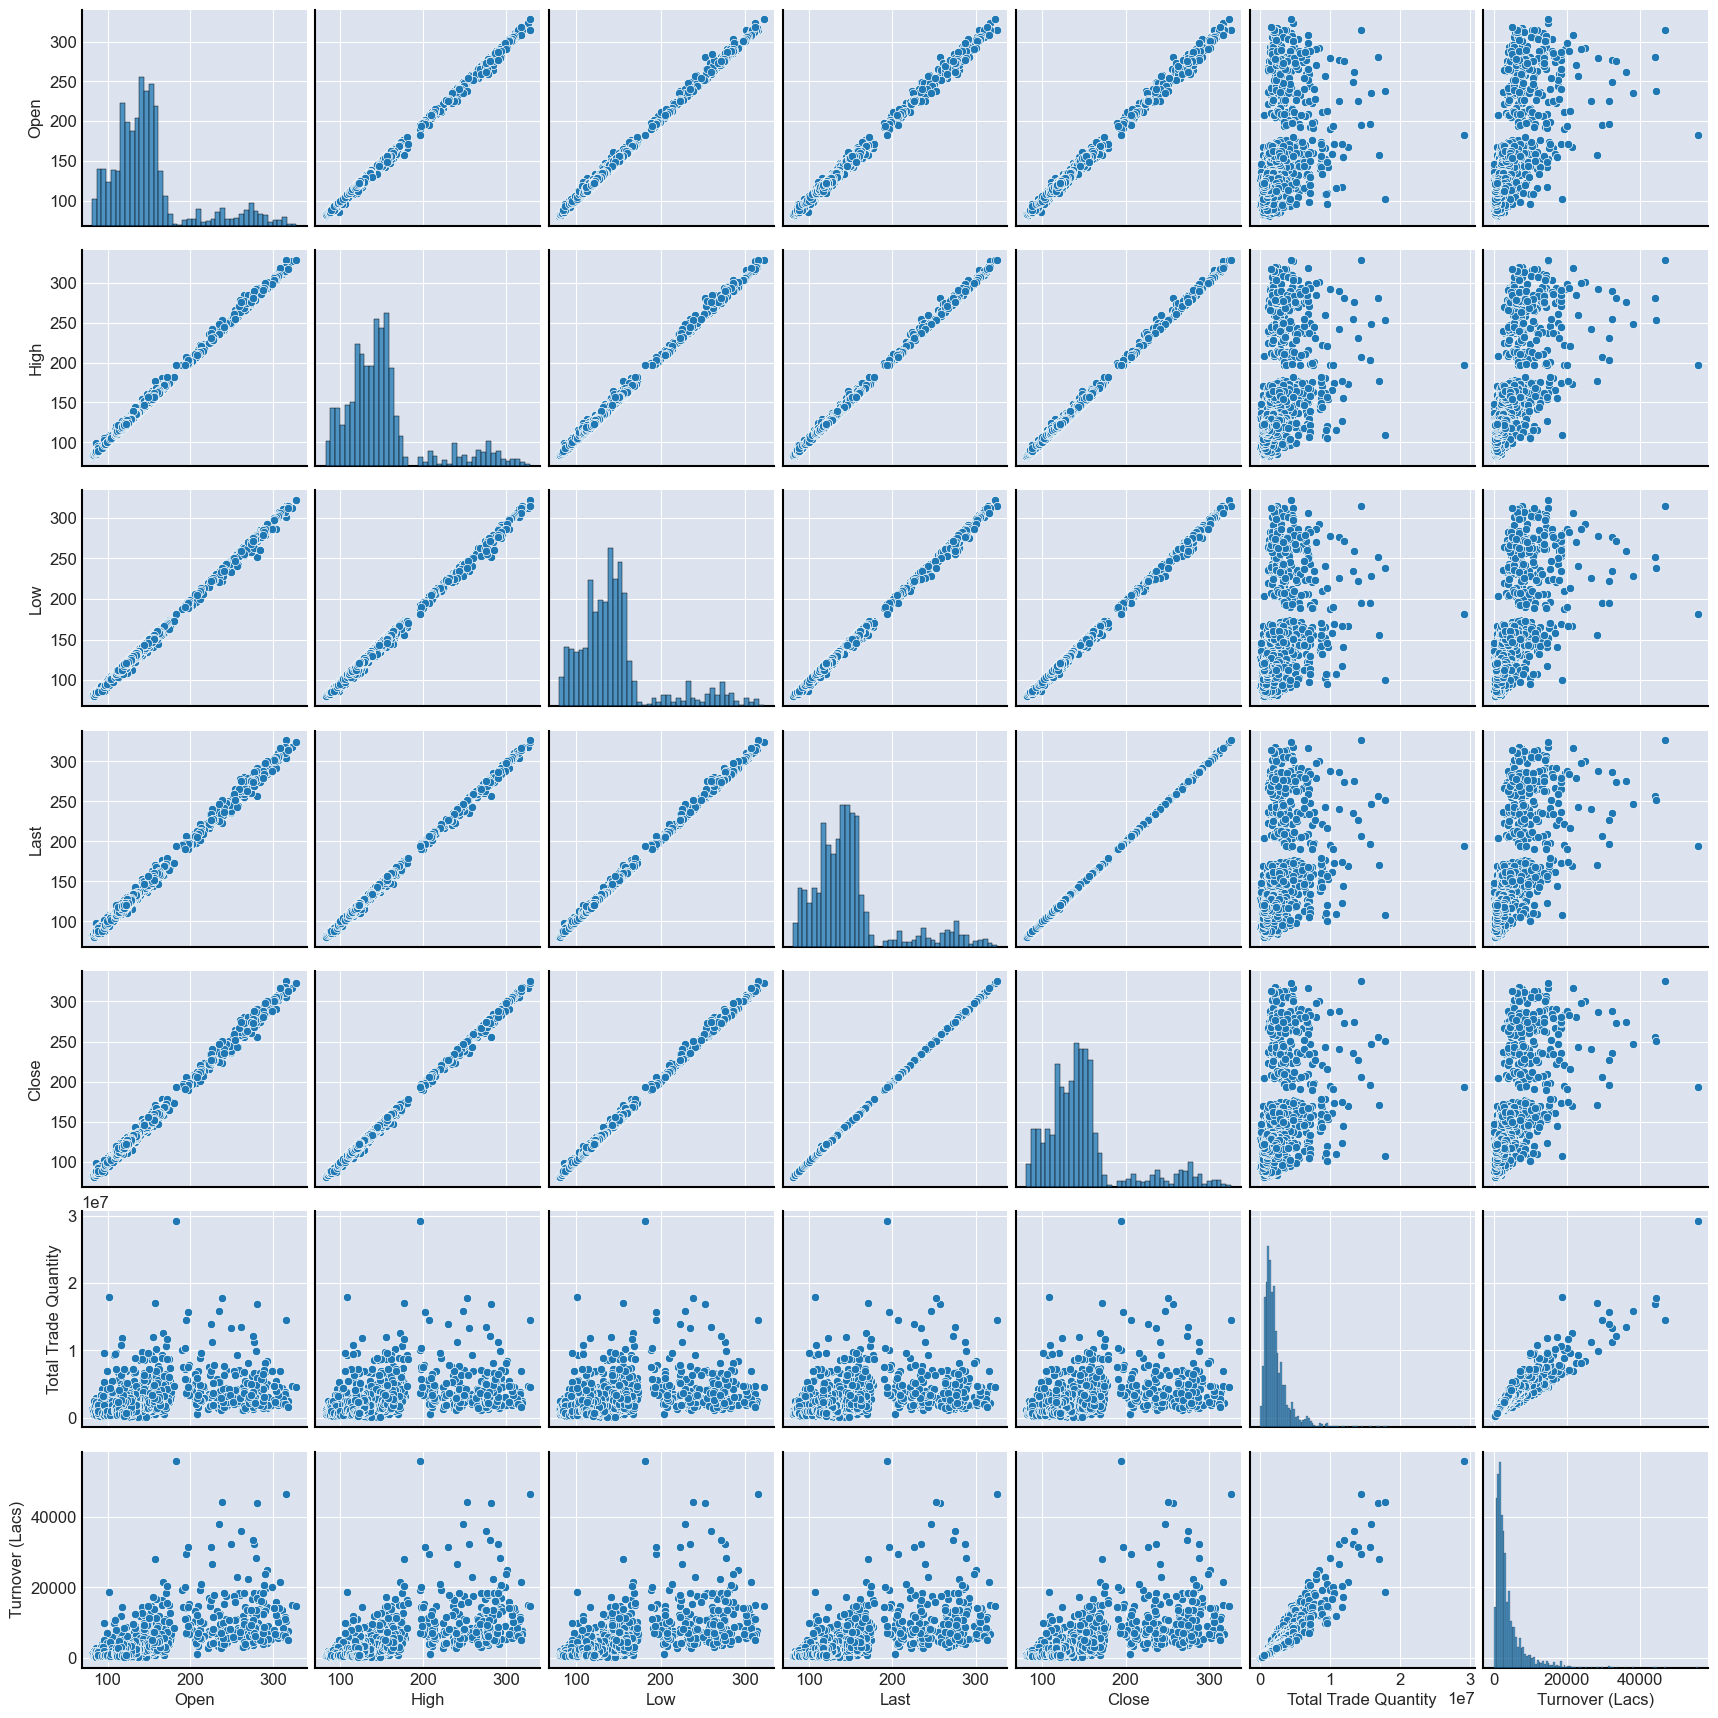

In [81]:
sns.pairplot(df)

<Axes: ylabel='Date'>

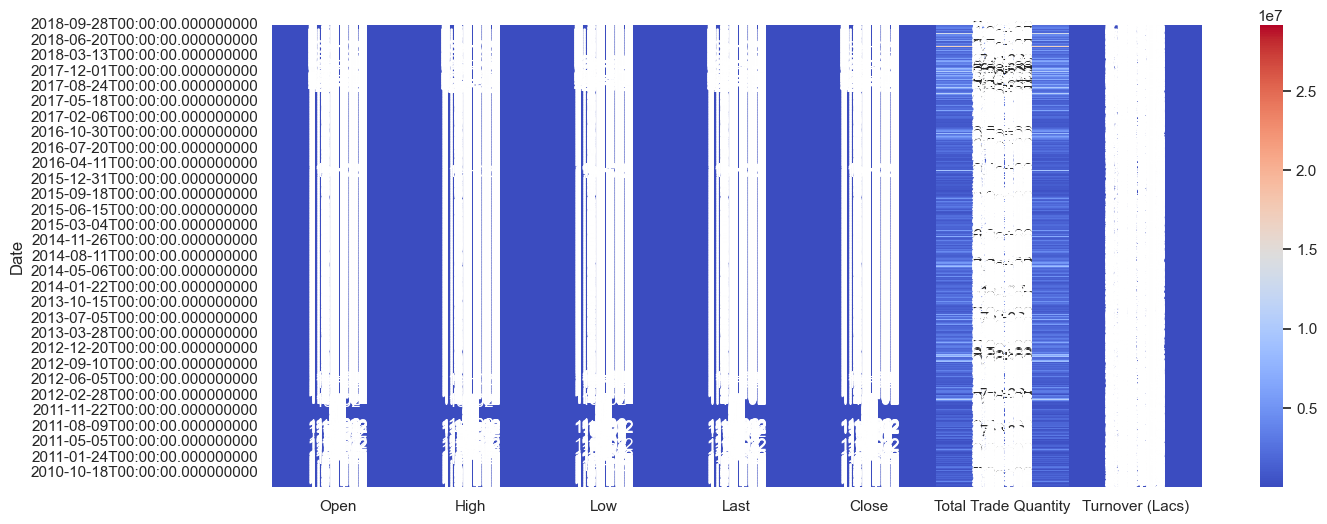

In [176]:
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(df, annot=True, cmap=cmap)

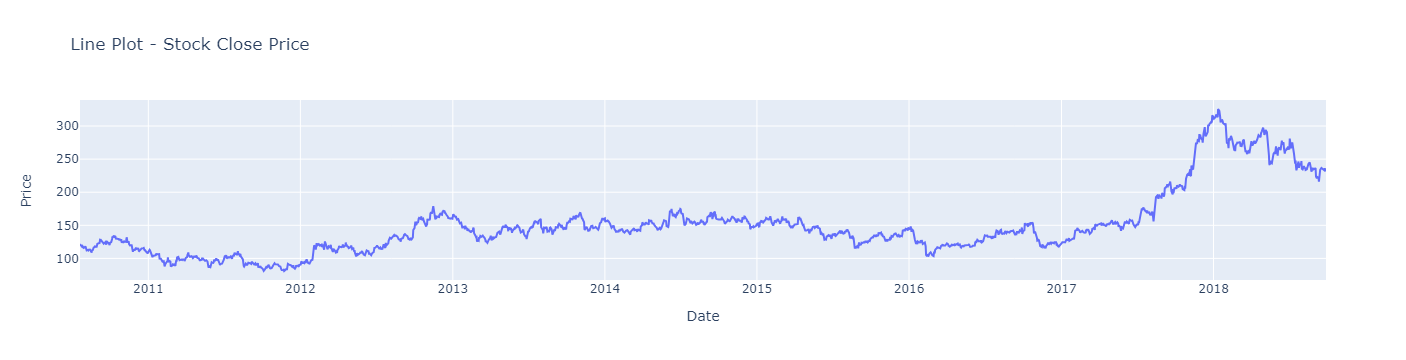

In [85]:
trace = go.Scatter(
    x=df.index,
    y=df['Close'],
    mode='lines',
    name='Close Price'
)

layout = go.Layout(
    title='Line Plot - Stock Close Price',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price')
)

data = [trace]

fig = go.Figure(data=data, layout=layout)

fig.show()


<Axes: xlabel='Date'>

<Figure size 3000x2000 with 0 Axes>

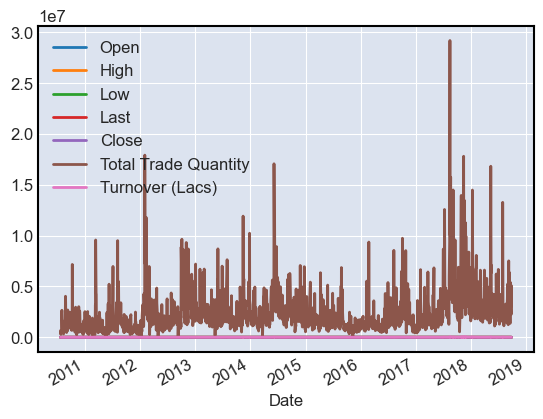

In [94]:
plt.figure(figsize=(30,20))
df.plot()

## **Scaling Data**

In [101]:
data = df.iloc[:, 0:5]
data

,Open,High,Low,Last,Close
Date,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75
2018-09-27,234.55,236.80,231.10,233.80,233.25
2018-09-26,240.00,240.00,232.50,235.00,234.25
2018-09-25,233.30,236.75,232.00,236.25,236.10
2018-09-24,233.55,239.20,230.75,234.00,233.30
...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65
2010-07-26,120.10,121.00,117.10,117.10,117.60
2010-07-23,121.80,121.95,120.25,120.35,120.65


In [110]:
training_set = data.iloc[:, 1:2].values
training_set

array([[235.95],
       [236.8 ],
       [240.  ],
       ...,
       [121.95],
       [122.  ],
       [123.  ]])

In [104]:
scaler = MinMaxScaler(feature_range = (0, 1))
data_training_scaled = scaler.fit_transform(training_set)
     

In [111]:
features_set = [data_training_scaled[i-60:i, 0] for i in range(60, 586)]
labels = [data_training_scaled[i, 0] for i in range(60, 586)]

In [112]:
features_set = np.array(features_set)
labels = np.array(labels)

features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
features_set.shape

(526, 60, 1)

## **Building Our Neural Network**

In [117]:
model = Sequential()
model.compile(optimizer='RMSprop', loss='mean_squared_error')
model.fit(features_set, labels, epochs=50, batch_size=30)

Epoch 1/50
18/18 [==============================] - 0s 700us/step - loss: 0.0119
Epoch 2/50
18/18 [==============================] - 0s 705us/step - loss: 0.0119
Epoch 3/50
18/18 [==============================] - 0s 765us/step - loss: 0.0119
Epoch 4/50
18/18 [==============================] - 0s 765us/step - loss: 0.0119
Epoch 5/50
18/18 [==============================] - 0s 706us/step - loss: 0.0119
Epoch 6/50
18/18 [==============================] - 0s 851us/step - loss: 0.0119
Epoch 7/50
18/18 [==============================] - 0s 941us/step - loss: 0.0119
Epoch 8/50
18/18 [==============================] - 0s 824us/step - loss: 0.0119
Epoch 9/50
18/18 [==============================] - 0s 765us/step - loss: 0.0119
Epoch 10/50
18/18 [==============================] - 0s 765us/step - loss: 0.0119
Epoch 11/50
18/18 [==============================] - 0s 765us/step - loss: 0.0119
Epoch 12/50
18/18 [==============================] - 0s 824us/step - loss: 0.0119
Epoch 13/50
18/18 [======

In [141]:
data_testing_complete = pd.read_csv(dataset)
data_testing_processed = data_testing_complete.iloc[:, 1:5]
data_testing_processed

,Open,High,Low,Last
0,234.05,235.95,230.20,233.50
1,234.55,236.80,231.10,233.80
2,240.00,240.00,232.50,235.00
3,233.30,236.75,232.00,236.25
4,233.55,239.20,230.75,234.00
...,...,...,...,...
2030,117.60,119.50,112.00,118.80
2031,120.10,121.00,117.10,117.10
2032,121.80,121.95,120.25,120.35
2033,120.30,122.00,120.25,120.75


# **Prediction**

In [139]:
data_total = pd.concat([data['Open'], data['Open']], axis=0)

In [138]:
test_inputs = data_total[-(len(data) + 60):].values
test_inputs_shape = test_inputs.shape

print(test_inputs_shape)

(2095,)


In [123]:
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
     

In [137]:
test_feature = [test_inputs[i-60:i, 0] for i in range(60, 89)]

In [136]:
test_feature = np.array(test_feature)
test_feature = np.reshape(test_feature, (test_feature.shape[0] - test_feature.shape[1], 1))
test_feature_shape = test_feature.shape

print(test_feature_shape)

(1740, 1)


In [135]:
test_feature = np.array(test_feature)  # Convert test feature to a NumPy array
test_feature = np.reshape(test_feature, (1, test_feature.shape[0], 1))  # Reshape the test feature

# Generate predictions using the trained model
predictions = model.predict(test_feature)

# Display the predictions
print(predictions)

[[[0.19963408]
  [0.21020533]
  [0.21020533]
  ...
  [0.6672088 ]
  [0.65541774]
  [0.642407  ]]]


In [134]:
x_train = data[:1256]
y_train = data[1:1257]
print(np.shape(x_train))
print(np.shape(y_train))

(1256, 5)
(1256, 5)


In [132]:
x_train

,Open,High,Low,Last,Close
Date,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75
2018-09-27,234.55,236.80,231.10,233.80,233.25
2018-09-26,240.00,240.00,232.50,235.00,234.25
2018-09-25,233.30,236.75,232.00,236.25,236.10
2018-09-24,233.55,239.20,230.75,234.00,233.30
...,...,...,...,...,...
2013-09-04,142.00,145.35,140.65,143.60,143.85
2013-09-03,144.10,145.20,140.70,141.80,141.55
2013-09-02,139.40,144.40,139.35,144.00,143.80


In [133]:
np.random.seed(1)
np.random.randn(3, 3)

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ]])

# **Plotting Results**

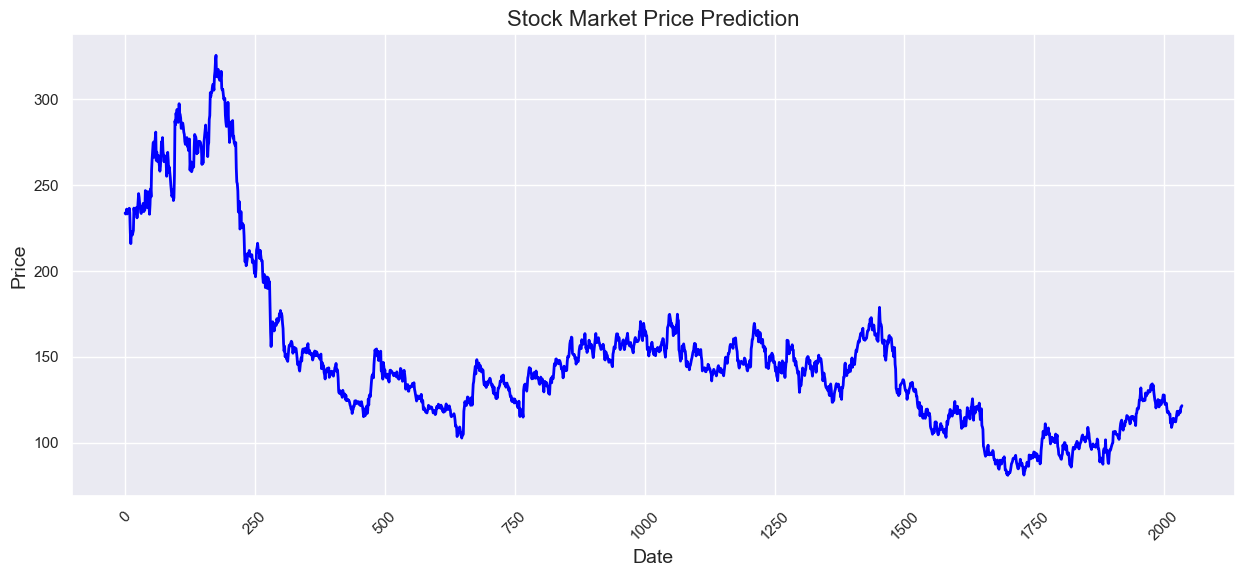

In [166]:
plt.figure(figsize=(15, 6))
plt.title("Stock Market Price Prediction", fontsize=16)
plt.plot(data_testing_complete['Close'], color='blue', linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

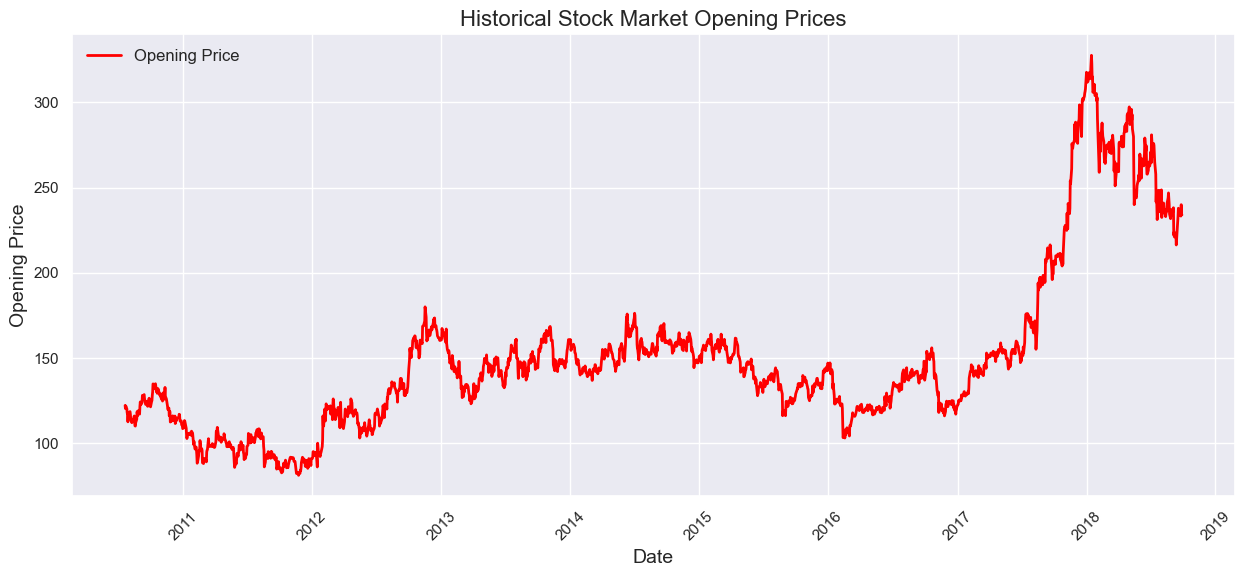

In [168]:
plt.figure(figsize=(15, 6))
plt.plot(data["Open"], label='Opening Price', color='red', linewidth=2)
plt.title('Historical Stock Market Opening Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Opening Price', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.show()

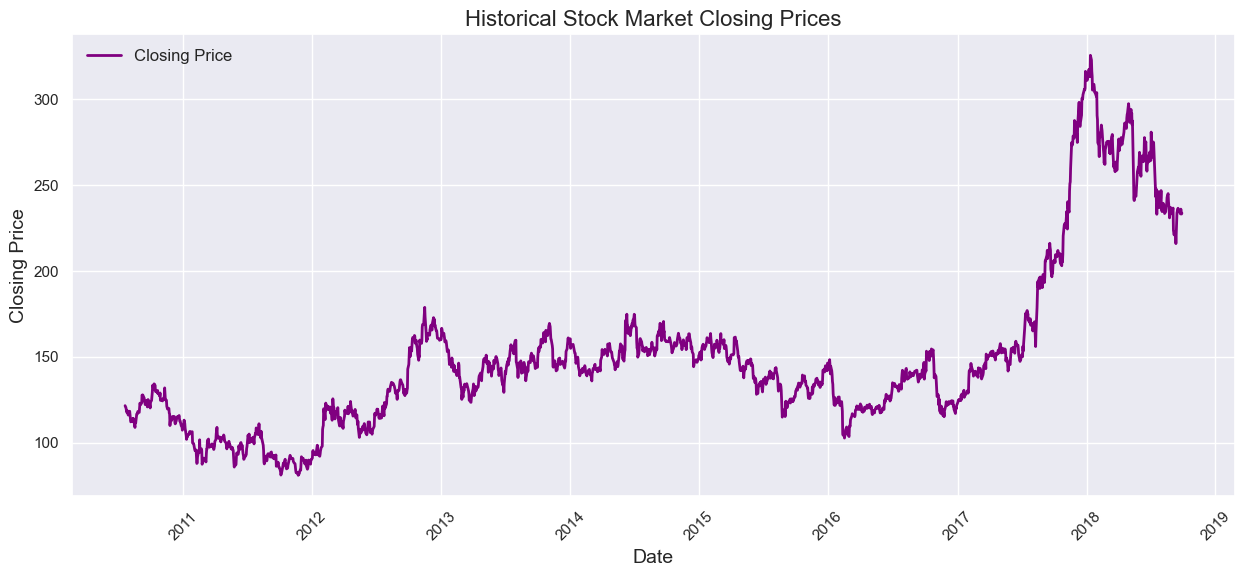

In [171]:
plt.figure(figsize=(15, 6))
plt.plot(data["Close"], label='Closing Price', color='purple', linewidth=2)
plt.title('Historical Stock Market Closing Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [159]:
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


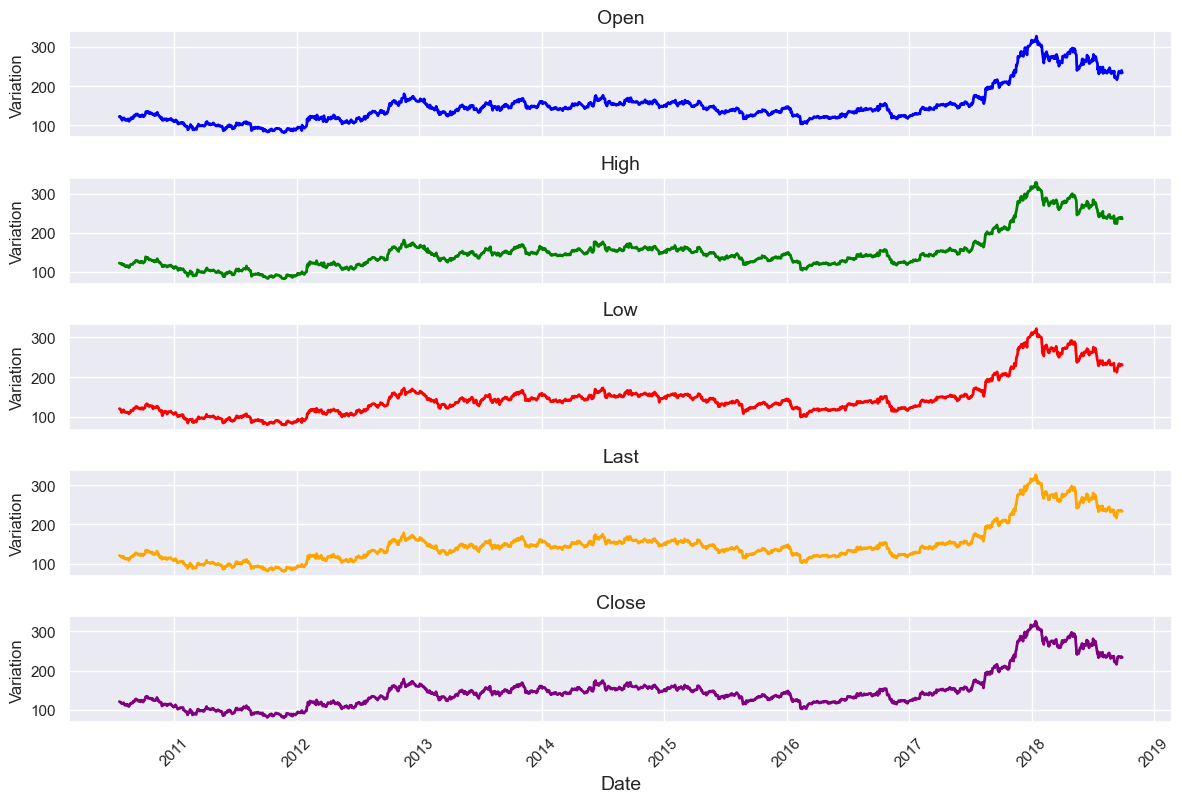

In [165]:
cols_plot = ['Open', 'High', 'Low', 'Last', 'Close']
colors = ['blue', 'green', 'red', 'orange', 'purple']

fig, axes = plt.subplots(nrows=len(cols_plot), figsize=(12, 8), sharex=True)

for i, (col, color) in enumerate(zip(cols_plot, colors)):
    axes[i].plot(df[col], linewidth=2, color=color)
    axes[i].set_ylabel('Variation', fontsize=12)
    axes[i].set_title(col, fontsize=14)
    axes[i].grid(True)

plt.xlabel('Date', fontsize=14)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()